# Importing data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Importing-data.ipynb)

**by Kozo Nishida, Alexander Pico, Barry Demchak**

**py4cytoscape 1.7.0**

This notebook will show you how to import a pandas.DataFrame of node attributes into Cytoscape as Node Table columns. The same approach works for edge and network attriubutes.

## Prerequisites
There are two options for using py4cytoscape.

1. **LOCAL** Cytoscape (3.10.0 or greater) + **Local** Jupyter environment (including py4cytoscape).
2. **LOCAL** Cytoscape (3.10.0 or greater) + **Remote** Jupyter environment (including py4cytoscape).

### Setup required for option **1.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Install Jupyter on your PC. (See https://jupyter.org/install)
- Install py4cytoscape with `pip install py4cytoscape` on your PC.

### Setup required for option **2.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Run the next cell.
  The next cell installs py4cytoscape in the **REMOTE** Jupyter environment and set up [Jupyter-Bridge](https://github.com/cytoscape/jupyter-bridge).
  (If you use your **LOCAL** Jupyter environment in **your desktop machine** same with Cytoscape, you can **skip** the next cell.)

In [2]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.7.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


Collecting py4cytoscape

Downloading py4cytoscape-1.11.0-py3-none-any.whl.metadata (4.8 kB)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (2.2.2)

Requirement already satisfied: networkx in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (3.4.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (2.32.3)

Collecting igraph (from py4cytoscape)

Downloading igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)

Collecting colorbrewer (from py4cytoscape)

Downloading colorbrewer-0.2.0-py3-none-any.whl.metadata (543 bytes)

Requirement already satisfied: chardet in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (5.2.0)

Requirement already satisfied: decorator in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (4.4.2)

Collecting backoff (from py4cytoscape)

Downloading backoff-2.2.1-py3-none-any.whl.metadata (14 kB)

Requirement already satisfied: colour in /usr/local/lib/python3.10/dist-packages (from py4cytoscape) (0.1.5)

Requirement already satisfied: six in /usr/local/lib/python3.10/dist-packages (from colorbrewer->py4cytoscape) (1.17.0)

Collecting texttable>=1.6.2 (from igraph->py4cytoscape)

Downloading texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)

Requirement already satisfied: numpy>=1.22.4 in /usr/local/lib/python3.10/dist-packages (from pandas->py4cytoscape) (1.26.4)

Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas->py4cytoscape) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->py4cytoscape) (2024.2)

Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.10/dist-packages (from pandas->py4cytoscape) (2024.2)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->py4cytoscape) (3.4.0)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->py4cytoscape) (3.10)

Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests->py4cytoscape) (2.2.3)

Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests->py4cytoscape) (2024.8.30)

Downloading py4cytoscape-1.11.0-py3-none-any.whl (181 kB)

Output()

Downloading backoff-2.2.1-py3-none-any.whl (15 kB)

Downloading colorbrewer-0.2.0-py3-none-any.whl (9.4 kB)

Downloading igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)

Output()

Downloading texttable-1.7.0-py2.py3-none-any.whl (10 kB)

Installing collected packages: texttable, igraph, colorbrewer, backoff, py4cytoscape

Successfully installed backoff-2.2.1 colorbrewer-0.2.0 igraph-0.11.8 py4cytoscape-1.11.0 texttable-1.7.0

NumExpr defaulting to 2 threads.

Loading Javascript client ... cf3cad03-c74e-40b5-8e20-cb9ae35339c0 on https://jupyter-bridge.cytoscape.org
ADVICE: WHEN RUNNING UNDER COLAB, DO NOT RE-RUN THIS CELL WITHOUT MANUALLY EXECUTING Runtime | Factory Reset Runtime FROM THE COLAB MENU FIRST.


<IPython.core.display.Javascript object>

### Sanity test to verify Cytoscape connection

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

By now, the connection to Cytoscape should be up and available. To verify this, try a simple operation that doesn't alter the state of Cytoscape.

In [3]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.11.0',
 'py4cytoscapeVersion': '1.11.0',
 'jupyterBridgeVersion': '0.0.2'}

## Always Start with a Network

When importing data, you are actually performing a merge function of sorts, appending columns to nodes (or edges) that are present in the referenced network. Data that do not match elements in the network are effectively discarded upon import.

So, in order to demonstrate data import, we first need to have a network. This command will import network files in any of the supported formats (e.g., SIF, GML, XGMML, etc).

In order to import the “SIF” file into Cytoscape, it must be on the local machine where Cytoscape installed, not on Colab. So use the FileTransfer App to send the SIF file to your local file system from Colab.

This operation is necessary even if you are using a local Jupyter Notebook instead of Colab. (This prevents reproducibility problems depending on the file path.)

In [4]:
p4c.sandbox_url_to("https://raw.githubusercontent.com/cytoscape/cytoscape-automation/master/for-scripters/Python/data/galFiltered.sif", "galFiltered.sif")

{'filePath': 'C:\\Users\\ADMIN\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\galFiltered.sif',
 'fileByteCount': 6861}

If you are using py4cytoscape in Jupyter Notebook, `import_network_from_file` will always try to read the file under the sandbox filepath.

In [5]:
p4c.import_network_from_file("galFiltered.sif")

{'networks': [409], 'views': [2524]}

You should now see a network with just over 300 nodes. If you look at the Node Table, you’ll see that there are no attributes other than node names. Let’s fix that…

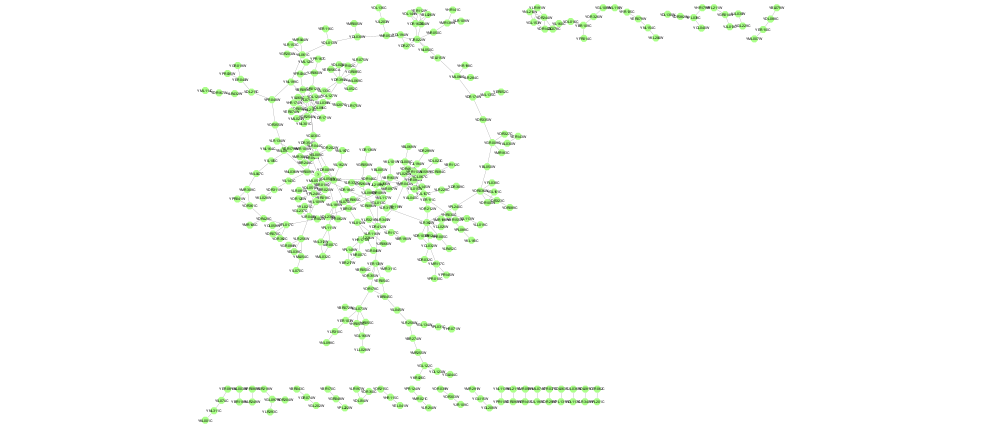

In [6]:
p4c.notebook_export_show_image()

## Import Data
You can import data into Cytoscape from any pandas.DataFrame in Python as long as it contains row names (or an arbitrary column) that match a Node Table column in Cytoscape. In this example, we are starting with a network with yeast identifiers in the “name” column. We also have a CSV file with gene expression data values keyed by yeast identifiers here:

In [7]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galExpData.csv")

In [8]:
data

,name,COMMON,gal1RGexp,gal1RGsig,gal4RGexp,gal4RGsig,gal80Rexp,gal80Rsig
0,YDL194W,SNF3,0.139,1.804300e-02,0.333,3.396100e-02,0.449,1.134800e-02
1,YDR277C,MTH1,0.243,2.190000e-05,0.192,2.804400e-02,0.448,5.730000e-04
2,YBR043C,YBR043C,0.454,5.370000e-08,0.023,9.417800e-01,0.000,9.999990e-01
3,YPR145W,ASN1,-0.195,3.170000e-05,-0.614,1.150000e-07,-0.232,1.187300e-03
4,YER054C,GIP2,0.057,1.695800e-01,0.206,6.200000e-04,0.247,4.360300e-03
...,...,...,...,...,...,...,...,...
324,YOR204W,DED1,-0.033,3.994400e-01,-0.056,3.126800e-01,-0.910,8.350000e-16
325,YGL097W,SRM1,0.160,2.191300e-03,-0.230,2.246100e-03,0.008,9.382600e-01
326,YGR218W,CRM1,-0.018,6.138100e-01,-0.001,9.794000e-01,-0.018,8.096900e-01
327,YGL122C,NAB2,0.174,8.730000e-04,0.020,6.170700e-01,0.187,5.996600e-03


**Note: there may be times where your network and data identifers are of different types. This calls for identifier mapping. py4cytoscape provides a function to perform ID mapping in Cytoscape:**

In [9]:
?p4c.map_table_column

Check out the Identifier mapping notebook for detailed examples.

Now we have a pandas.DataFrame that includes our identifiers in a column called “name”, plus a bunch of data columns. Knowing our key columns, we can now perform the import:

In [10]:
p4c.get_table_columns()

,SUID,shared name,id,moleculeType,log2fc,row.names,name,selected
1024,1024,YDR335W,None,None,NaN,None,YDR335W,False
1026,1026,YDR174W,None,None,NaN,None,YDR174W,False
1538,1538,YBL050W,None,None,NaN,None,YBL050W,False
516,516,YGR203W,None,None,NaN,None,YGR203W,False
518,518,YIL061C,None,None,NaN,None,YIL061C,False
...,...,...,...,...,...,...,...,...
1526,1526,YJL194W,None,None,NaN,None,YJL194W,False
506,506,YJL013C,None,None,NaN,None,YJL013C,False
1018,1018,YMR021C,None,None,NaN,None,YMR021C,False
1020,1020,YLR214W,None,None,NaN,None,YLR214W,False


In [11]:
p4c.load_table_data(data, data_key_column="name")

'Success: Data loaded in defaultnode table'

If you look back at the Node Table, you’ll now see that the corresponding rows of our pandas.DataFrame have been imported as new columns.


In [12]:
p4c.get_table_columns()

,SUID,shared name,id,moleculeType,log2fc,row.names,name,selected,COMMON,gal1RGexp,gal1RGsig,gal4RGexp,gal4RGsig,gal80Rexp,gal80Rsig
1024,1024,YDR335W,None,None,NaN,None,YDR335W,False,MSN5,0.028,8.595000e-01,0.189,0.071598,0.272,2.334000e-01
1026,1026,YDR174W,None,None,NaN,None,YDR174W,False,HMO1,-0.314,5.160000e-08,-0.083,0.103720,-0.356,3.470000e-08
1538,1538,YBL050W,None,None,NaN,None,YBL050W,False,SEC17,-0.066,1.121300e-01,-0.044,0.487220,0.106,2.370600e-01
516,516,YGR203W,None,None,NaN,None,YGR203W,False,YGR203W,-0.141,3.957500e-02,-0.085,0.435540,-0.340,2.245100e-01
518,518,YIL061C,None,None,NaN,None,YIL061C,False,SNP1,0.165,1.307200e-02,-0.635,0.000490,0.181,2.811900e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1526,YJL194W,None,None,NaN,None,YJL194W,False,CDC6,0.018,8.363500e-01,-0.661,0.000045,0.525,5.000400e-02
506,506,YJL013C,None,None,NaN,None,YJL013C,False,MAD3,-0.072,1.446900e-01,-0.154,0.046575,0.084,5.277800e-01
1018,1018,YMR021C,None,None,NaN,None,YMR021C,False,MAC1,0.022,6.115000e-01,-0.032,0.592360,0.066,5.411900e-01
1020,1020,YLR214W,None,None,NaN,None,YLR214W,False,FRE1,0.518,4.680000e-09,-0.279,0.001811,0.282,3.905100e-02


**Note: we relied on the default values for table (“node”) and table_key_column (“name”), but these can be specified as well. See help docs for parameter details.**

In [13]:
?p4c.load_table_data